# Module 5 – Episode 18: Visualizing Accident Data on a Map (Lisbon)

Welcome! In this notebook, we’ll learn how to load and visualize a real-world geospatial dataset using `GeoPandas` and `Contextily`.  
We’ll use a dummy dataset of accident points in Lisbon with varying severity levels (1–5).

## Install Required Libraries

In [1]:
!pip install geopandas contextily --quiet

## Load and Convert the CSV File

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("data/Dummy_Accident_Dataset_Lisbon.csv")

# Convert latitude and longitude into geometry
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Preview data (show only the first 5 rows)
gdf.head()

,ID,Latitude,Longitude,Severity,geometry
0,1,38.731971,-9.127767,1,POINT (-9.12777 38.73197)
1,3,38.713751,-9.146390,2,POINT (-9.14639 38.71375)
2,4,38.711161,-9.153781,3,POINT (-9.15378 38.71116)
3,5,38.736824,-9.121711,1,POINT (-9.12171 38.73682)
4,6,38.733835,-9.146536,2,POINT (-9.14654 38.73384)


In [3]:
# Dataset description
df.describe()

,ID,Latitude,Longitude,Severity
count,25.000000,25.000000,25.000000,25.000000
mean,15.840000,38.722818,-9.139749,2.480000
std,8.692334,0.012022,0.010879,1.228821
min,1.000000,38.704347,-9.156290,1.000000
25%,8.000000,38.710932,-9.149950,2.000000
50%,17.000000,38.721096,-9.140000,2.000000
75%,23.000000,38.733835,-9.130000,3.000000
max,29.000000,38.744609,-9.121711,5.000000


## Reproject Data for Mapping

In [4]:
# Reproject to EPSG:3857 for compatibility with basemaps
gdf = gdf.to_crs(epsg=3857)

## Plot Accident Severity on a Map

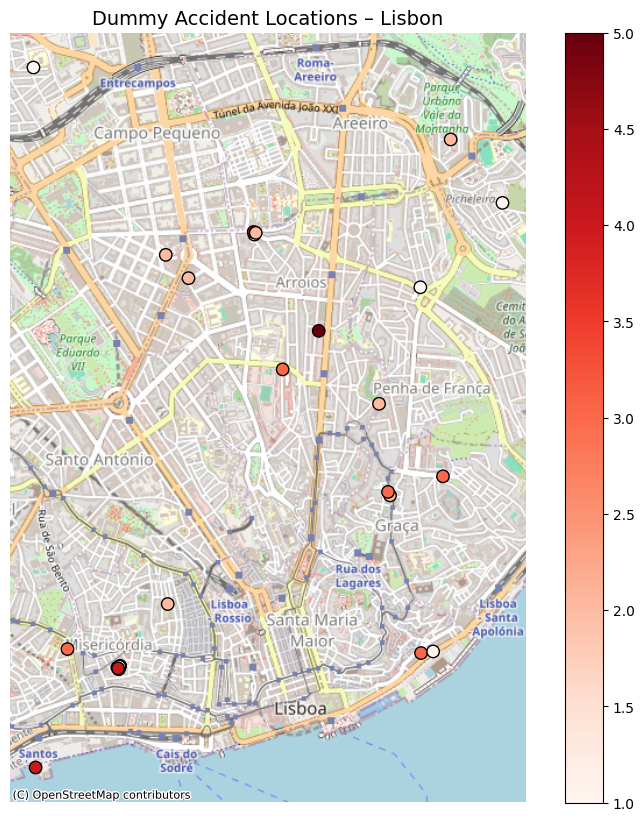

In [5]:
import contextily as ctx

# Plot accident points
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(
    ax=ax,
    column="Severity",
    cmap="Reds",
    legend=True,
    markersize=80,
    edgecolor="black"
)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Dummy Accident Locations – Lisbon", fontsize=14)
ax.axis("off")
plt.show()

## Summary
In this episode, you learned how to visualize real-world geospatial data using `GeoPandas` and `Contextily`.

You loaded a CSV file of dummy accident data in Lisbon, converted latitude and longitude into geospatial points, and visualized accident severity using color-coded markers.  